In [64]:
# Installing XGBoost
!pip install xgboost catboost

In [65]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Initial Setup
sns.set(style = "whitegrid")
np.random.seed(42)

In [67]:
# Extracting the data
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [68]:
# EDA
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [69]:
#Seperating the input features and target variable
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [34]:
# printing the results
print(f"Features ({len(feature_names)}) : {list(feature_names)}")
print(f"Target ({len(target_names)}) : {list(target_names)}")

Features (30) : [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]
Target (2) : [np.str_('malignant'), np.str_('benign')]


In [70]:
# Explore Class Distribution

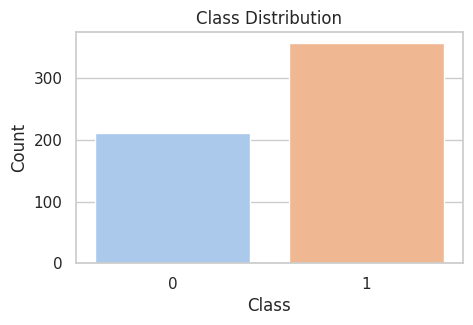

In [71]:
# Explore Class Distribution
plt.figure(figsize = (5, 3))
sns.countplot(x = y, palette = 'pastel')
plt.xticks([0, 1])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [72]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [73]:
#Defining the model and hyper parameters grad
print("\nSetting up models and parameters ...")
dt = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth'  : [3, 5], 'min_samples_split' : [2, 5]}


Setting up models and parameters ...


In [74]:
# Random Forest
rf = RandomForestClassifier(random_state = 42)
rf_params = {'n_estimators' : [50], 'max_depth' : [5], 'min_samples_split' : [2]}

In [75]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 42)
ada_params = {'n_estimators' : [50], 'learning_rate' : [0.1]}

In [76]:
# XGBoost
xgb = XGBClassifier(random_state = 42)
xgb_params = {'n_estimators' : [50], 'max_depth' : [3], 'learning_rate' : [0.1]}

In [77]:
# catBoost
cat = CatBoostClassifier(random_state = 42)
cat_params = {'n_estimators' : [100], 'max_depth' : [3], 'learning_rate' : [0.1]}

In [79]:
# Making the list of models
models = {
    "Decision Tree" : (dt, dt_params),
    "Random Forest" : (rf, rf_params),
    "AdaBoost" : (ada, ada_params),
    "XGBoost" : (xgb, xgb_params),
    "CatBoost" : (cat, cat_params)
}

In [81]:
# Training the model with hyper parameter tuning
best_models = {}
print('\nStarting training and hyperparameter tuning ...')
for name, (clf, params) in models.items():
  print(f"\n Training {name}")
  grid = GridSearchCV(clf, params, cv = 3, scoring = 'accuracy')
  grid.fit(X_train, y_train)
  best_model = grid.best_estimator_
  best_models[name] = best_model
  print(f"\nBest Parameters for {name} : {grid.best_params_}")
  print(f"Best cross-validated accuracy : {grid.best_score_:.4f}")


Starting training and hyperparameter tuning ...

 Training Decision Tree

Best Parameters for Decision Tree : {'max_depth': 3, 'min_samples_split': 2}
Best cross-validated accuracy : 0.9209

 Training Random Forest

Best Parameters for Random Forest : {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy : 0.9472

 Training AdaBoost

Best Parameters for AdaBoost : {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validated accuracy : 0.9538

 Training XGBoost

Best Parameters for XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated accuracy : 0.9648

 Training CatBoost
0:	learn: 0.5644935	total: 2.31ms	remaining: 229ms
1:	learn: 0.4879693	total: 4.32ms	remaining: 211ms
2:	learn: 0.4163206	total: 6.17ms	remaining: 199ms
3:	learn: 0.3722281	total: 8.04ms	remaining: 193ms
4:	learn: 0.3236418	total: 9.97ms	remaining: 189ms
5:	learn: 0.2814518	total: 11.8ms	remaining: 185ms
6:	learn: 0.2542876	total: 13.6ms	remai

In [45]:
# Training the model with hyper parameter tuning
best_models = {}
print('\nStarting training and hyperparameter tuning ...')
for name, (clf, params) in models.items():
  print(f"\n Training {name}")


Starting training and hyperparameter tuning ...

 Training Decision Tree

 Training Random Forest

 Training AdaBoost

 Training XGBoost

 Training CatBoost


In [82]:
# Evaluating models on test data set
results = {}
print('\nEvaluating models on test set ...')
for name, model in best_models.items():
  y_pred = model.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  results[name] = acc
  print(f"\n {name} Accuracy : {acc:.4f}")
  # print(f"Classifiation Report for {name} :")
  # print(metrics.classification_report(y_test, y_pred))


Evaluating models on test set ...

 Decision Tree Accuracy : 0.9474

 Random Forest Accuracy : 0.9649

 AdaBoost Accuracy : 0.9561

 XGBoost Accuracy : 0.9561

 CatBoost Accuracy : 0.9737


In [83]:
# print()
print(results)

{'Decision Tree': 0.9473684210526315, 'Random Forest': 0.9649122807017544, 'AdaBoost': 0.956140350877193, 'XGBoost': 0.956140350877193, 'CatBoost': 0.9736842105263158}


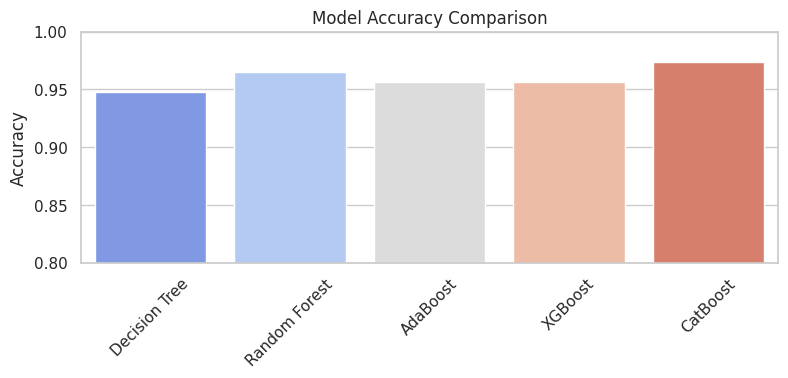

In [84]:
# Visualize the results
plt.figure(figsize = (9, 3))
sns.barplot(x = list(results.keys()), y = list(results.values()), palette = 'coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)
plt.ylim(0.8, 1)
plt.show()


Confusion Matrix :


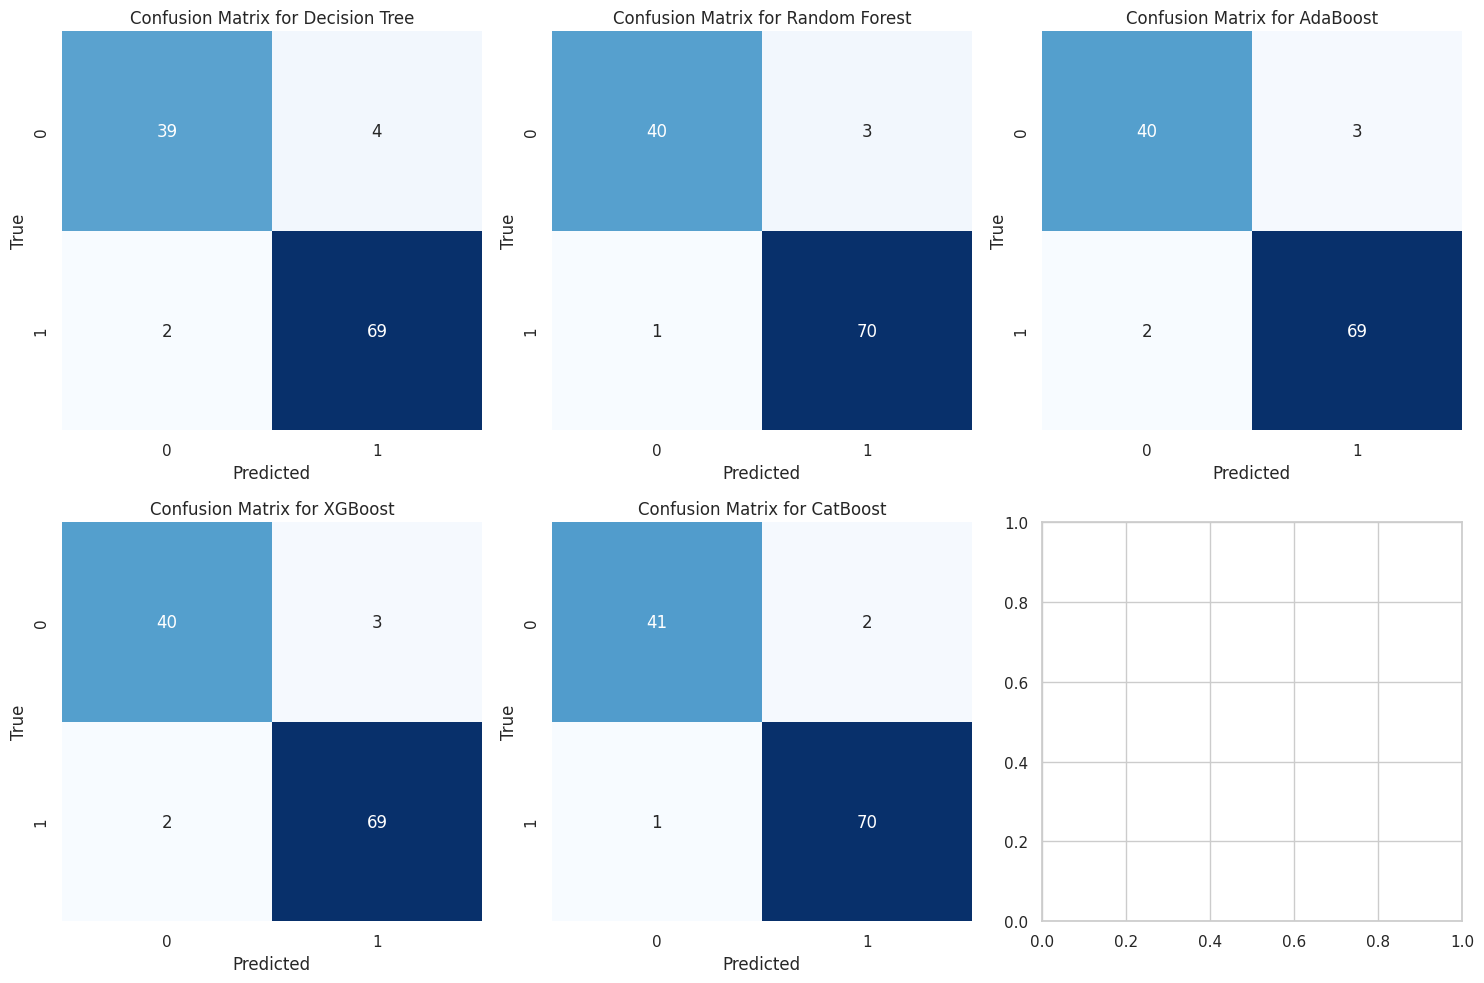

In [85]:
# Confusion Matrix
print('\nConfusion Matrix :')
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
axes = axes.flatten()
for idx, (name, model) in enumerate(best_models.items()):
  if idx >= 6:
    break
  y_pred = model.predict(X_test)
  cm = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, ax = axes[idx])
  axes[idx].set_title(f'Confusion Matrix for {name}')
  axes[idx].set_xlabel('Predicted')
  axes[idx].set_ylabel('True')
plt.tight_layout()
plt.show()



ROC Curves :


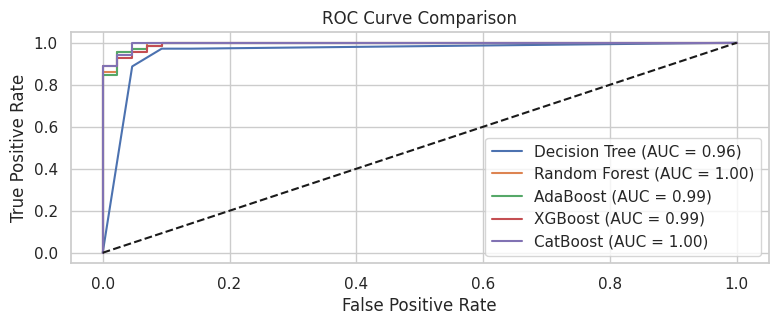

In [86]:
# ROC AUC Curve
print('\nROC Curves :')
plt.figure(figsize = (9, 3))
for name, model in best_models.items():
  y_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, label = f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
plt.show()


Feature Importance :


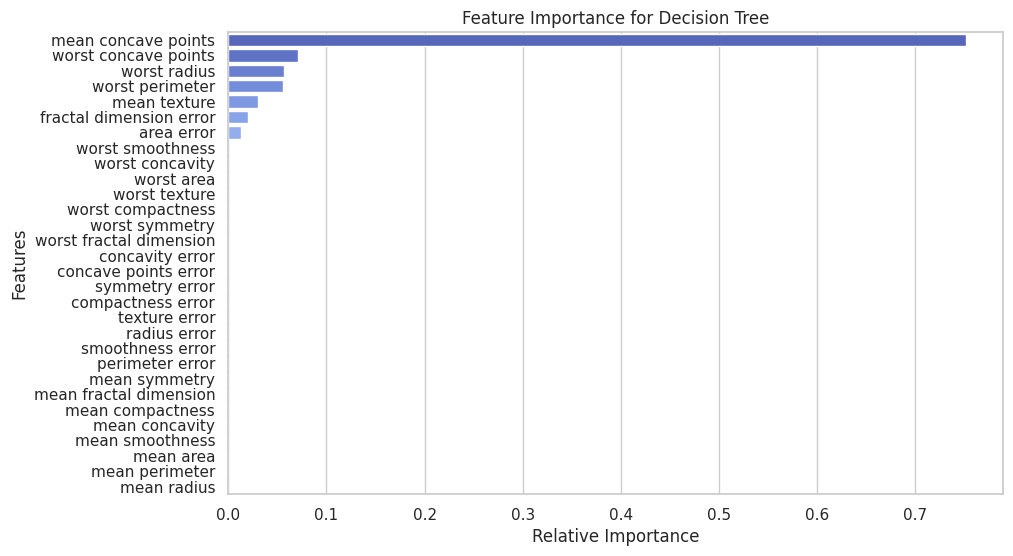

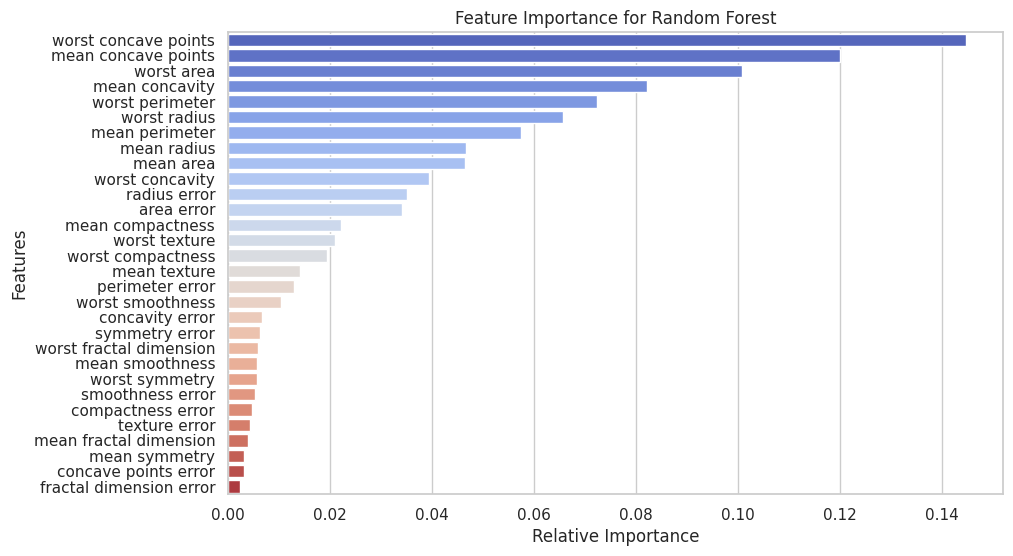

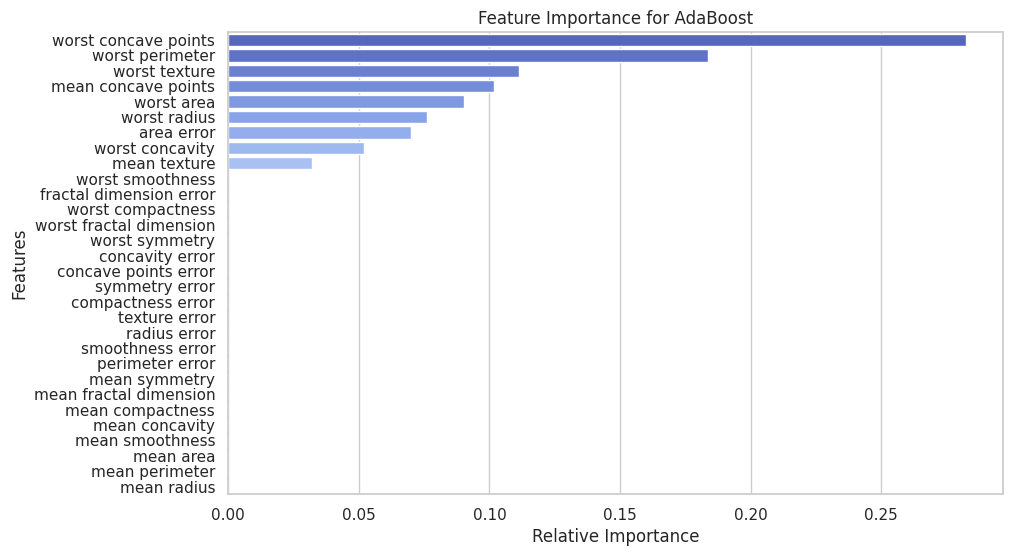

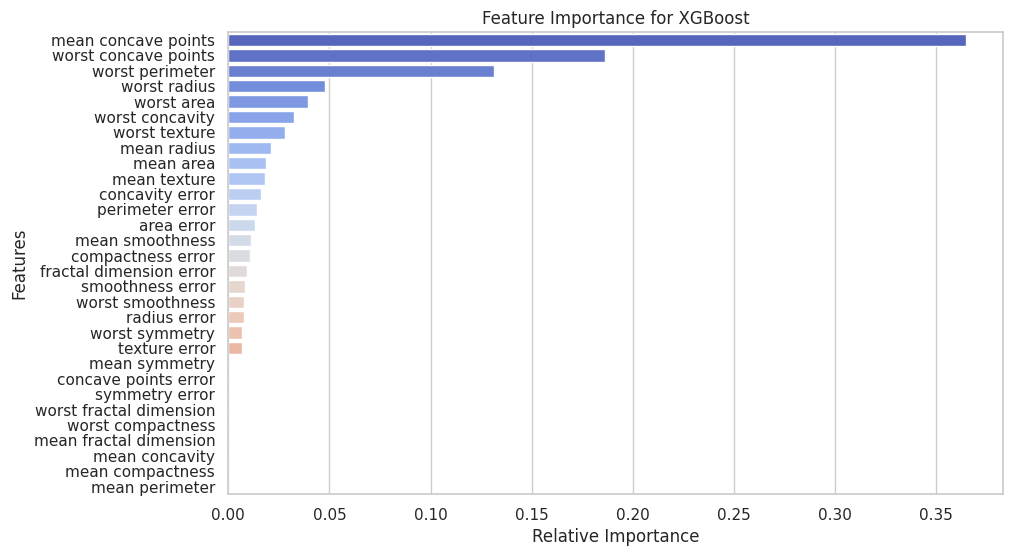

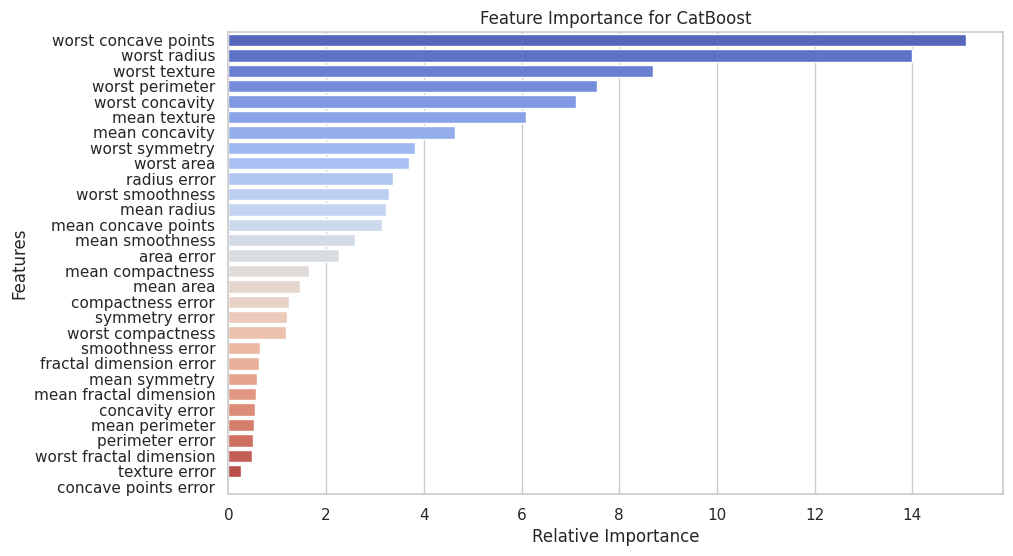

In [87]:
# Feature Importance (for tree-based models)
print('\nFeature Importance :')
for name, model in best_models.items():
  if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize = (10, 6))
    plt.title(f'Feature Importance for {name}')
    sns.barplot(x = importances[indices], y = [feature_names[i] for i in indices], palette = 'coolwarm')
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    plt.show()

In [88]:
# Saving the Best Model using pickle
best_model_name = max(results, key = results.get)
best_model = best_models[best_model_name]
print(f"\nBest Model : {best_model_name} with accuracy : {results[best_model_name]:.4f}")

filename = 'best_model.pkl'
import pickle
with open(filename, 'wb') as file:
  pickle.dump(best_model, file)
print(f"Saved best model to {filename}")


Best Model : CatBoost with accuracy : 0.9737
Saved best model to best_model.pkl
